# LIBRARIES

In [130]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Save raw data
df.to_csv('raw_data.csv', index=False)

# Customer Churn Analysis for Telecom Company

## Goals :

- **Understand the data**: Perform an exploratory data analysis to comprehend the structure and relationships within the data.
- **Develop a first modeling strategy**: Identify key factors influencing customer churn and lay the groundwork for predictive modeling.

---
## Overview :

### 1. Data Shape and Structure:
  
- **Rows and Columns**: 7,043 rows and 21 columns

- **Variable Types**:
    - **Categorical**: 17 (object)
    - **Numeric**: 3 (int, float)
    - Note: The variable TotalCharges is currently an object but should be converted to a continuous variable. SeniorCitizen is an integer but represents a categorical variable (1 or 0) and should be converted to an object.
 
</tr>

### 2. Data Cleaning:

- **CustomerID**: Irrelevant for analysis; will be dropped.
- **TotalCharges**: Contains 11 instances of space values corresponding to new customers with 0 tenure and thus no charges yet. These should be converted to 0.

### 3. Missing Values:

- **Analysis**: No missing values.
- **Special Cases**: 11 spaces in TotalCharges to be replaced with 0.

### 4. Target Variable:

- **Churn Rate**: 26.5% (1,869 out of 7,043 customers)
- **Class Imbalance**: Significant imbalance with 73.5% non-churn and 26.5% churn. Metrics like Recall, Precision, and F1-score will be crucial for model evaluation, not just accuracy.

---
## Data Analysis:

### 1. Variable Descriptions:

- **Demographics**:
    - 'gender', 'SeniorCitizen', 'Partner', 'Dependents'

</tr>

- **Services Subscribed**:
    - 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'

</tr>

- **Account Details**:
    - 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'

### 2. Target Variable Visualization:

- **Churning Rate**: Visualize the distribution of the churn variable.
- **Imbalance Handling**: Plan to address imbalance in the dataset through techniques like resampling or using algorithms suited for imbalanced data.

### 3. Variable Relationships with Churn:

#### Categorical variables :
- **Demographic Details**:
    - **'Gender'**: No significant influence on churn.
    - **'SeniorCitizen', 'Partner', 'Dependents'**: Influence churn rates (e.g., seniors, singles, and independents have higher churn rates).

</tr>

- **Services Subscribed**:
    - **'PhoneService'**: No significant influence.
    - **'MultipleLines'**: Slightly increases churn.
    - **'InternetService'**: High influence for Fiber optic with a churn rate of 69.4%.
    - **Optional Internet Services ('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'**): Generally, these services decrease churn among internet customers.

</tr>

- **Account Details**:
    - **'Contract'**: Month-to-month contracts see the highest churn rate (88.6%).
    - **'PaperlessBilling'**: Increases churn (74.9%).
    - **'PaymentMethod'**: Electronic check payments have the highest churn rate (57.3%).

#### Continuous Variables:

- **'Total Charges'**: Lower total charges are associated with higher churn, likely indicating newer customers.
- **'Tenure'**: Shorter tenure correlates with higher churn. 75% of churn occurs before 30 months. Median tenure: 10 months for churners, 38 months for non-churners.
- **'Monthly Charges'**: Higher monthly charges are linked to higher churn, with a notable increase in churn probability around $65/month.

#### Correlation Analysis:

- **Internet Services**: Strong correlation between optional internet services and main internet service type (+0.61).
- **Phone Services**: Strong correlation between MultipleLines and PhoneService (+0.61).

---

## Conclusion:

- **Clean Dataset**: No missing values after addressing special cases.
- **Variable Types**: 85% of variables are discrete.
- **Class Imbalance**: Significant imbalance in the target variable.

**Key Influencing Variables**:
- **Demographics: 'SeniorCitizen', 'Partner', 'Dependents'**
- **Services: 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'**
- **Account: 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure'**

## 1)  Shape Analysis

In [131]:
# Load data
data = pd.read_csv('/Users/wisdomaniac/Google Drive/PROJETS/DATA Science/PORTFOLIO/DS-Project/Customer Churn/Customer-Churn.csv')
df = data.copy()
# Initial exploration
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)
print(df.dtypes.value_counts().sum)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### Cleaning data : missing values / duplicates / empty spaces / dtypes

In [132]:
#Check for duplicate
print(sum(df.duplicated()))

#Check for missing values as a diagram
print(msno.bar(df))

# Check for empty strings and blank spaces
missing_vals = [""," "]
print(df.isin(missing_vals).sum())

0
AxesSubplot(0.125,0.11;0.775x0.77)
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [133]:
#Check the entries with blank spaces in the 'TotalCharges' values.
print(df[(df['TotalCharges']== " ")])

#Comparing entries with tenure = 0 and Totalcharges = empty string
print(df[(df['tenure']== 0)].index)
print(df[(df['TotalCharges']== " ")].index)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [134]:
#Replace the 11 entries blanks spaces in 'TotalCharges' values with 0
df = df.replace(to_replace =' ', value =0)

df[(df['TotalCharges']== 0)]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55             0    No  
753                Mailed check          20.25             0    No  
936                Mailed check          80.85             0    No  
1082               Mailed check          25.75             0    No  
1340    Credit card (automatic)          56.05             0    No  
3331               Mailed check          19.85             0    No  
3826               Mailed check          25.35             0    No  
4380               Mailed check          20.00             0    No  
5218               Mailed check          19.7

In [169]:
#Drop the customerID feature (useless to predict churn customer)
#df = df.drop(['customerID'], axis = 1)

#Change the data type of 'TotalCharges' feature from object to float
df['TotalCharges']= pd.to_numeric(df.TotalCharges, errors ='coerce')

#Change the data type of 'SeniorCitizen' from int to object
df['SeniorCitizen']= df['SeniorCitizen'].astype('object') 

print(df.dtypes.value_counts().sum)

# Save Clean data
df.to_csv('clean_data.csv', index=False)

<bound method Series.sum of object     17
float64     2
int64       1
Name: count, dtype: int64>


## 2) Background Analysis

### Target Variable

In [152]:
print(df['Churn'].value_counts(normalize=True))
print(df['Churn'].value_counts())

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
Churn
No     5174
Yes    1869
Name: count, dtype: int64


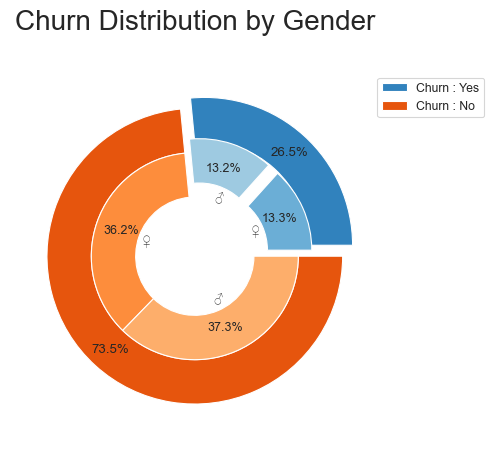

In [137]:
#Create variable to observe churn distribution by gender
not_churn = df['Churn'][df['Churn']=='No'].groupby(by=df['gender']).count()

churn = df['Churn'][df['Churn']=='Yes'].groupby(by=df['gender']).count()


#transform variable into numpy array for visualization
churn_np = churn.to_numpy()
not_churn_np = not_churn.to_numpy()


#Visualisation of churn distribution by gender
fig, ax = plt.subplots()

size = 0.3
vals = np.array([churn_np,not_churn_np])
labels = ['Churn : Yes', 'Churn : No']
labels_gender = ['♀', '♂', '♀', '♂']

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6])
explode = (0.1,0) 
explode_gender = (0.1,0.1,0,0) 


ax.pie(vals.sum(axis=1), 
       radius = 1, 
       explode = explode,
       colors = outer_colors,
       autopct = '%1.1f%%',
       pctdistance = 0.85,
       wedgeprops = dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(),
       labels = labels_gender,
       radius = 1-size,
       labeldistance=0.45,
       textprops={'fontsize': 9},
       explode = explode_gender,
       colors = inner_colors, 
       autopct = '%1.1f%%',
       pctdistance = 0.75,
       wedgeprops = dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Churn distribution by Gender')
ax.set_title('Churn Distribution by Gender', size=20, pad = 30)
ax.legend(labels, loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
plt.show()

### Continuous Variables plotting

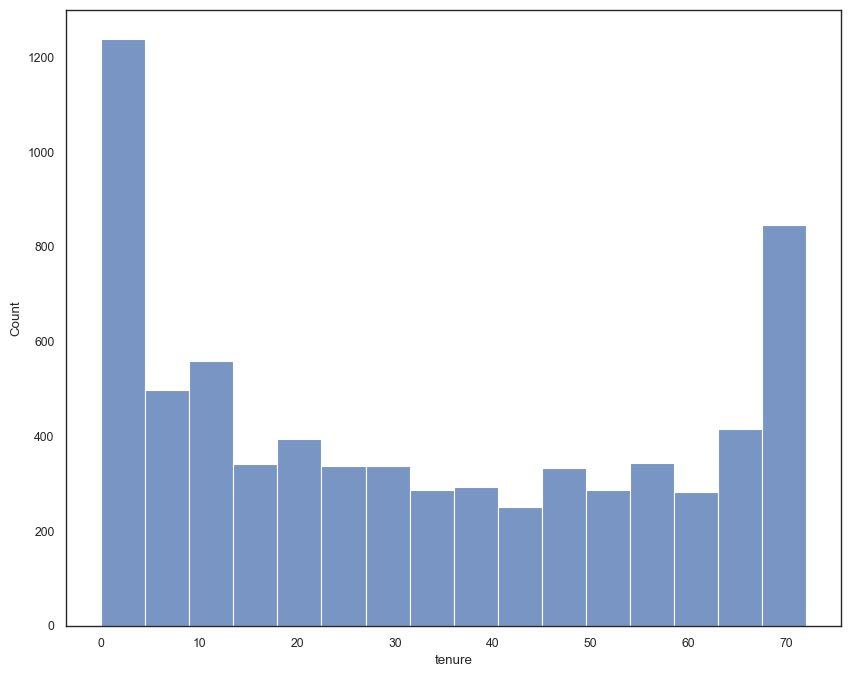

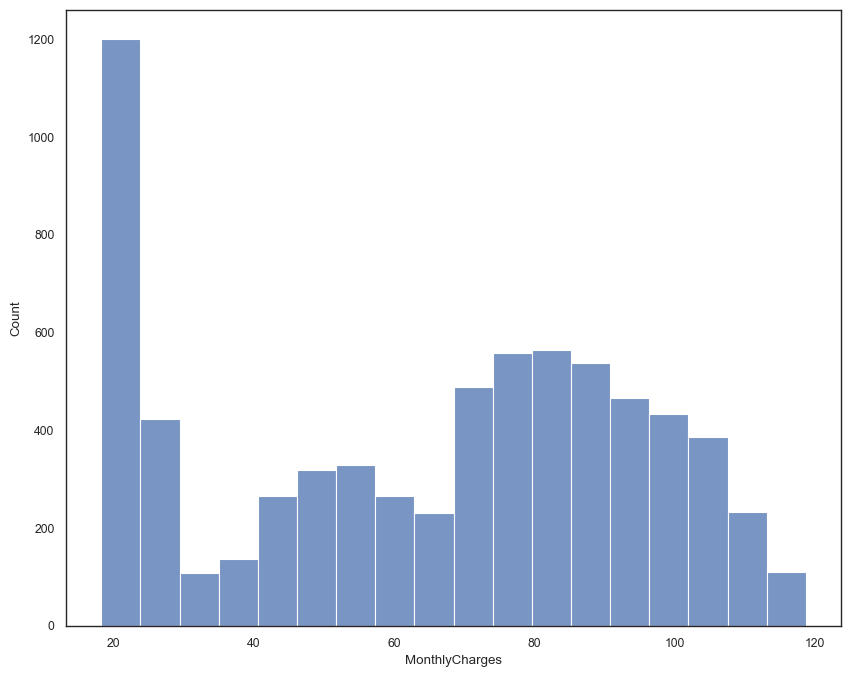

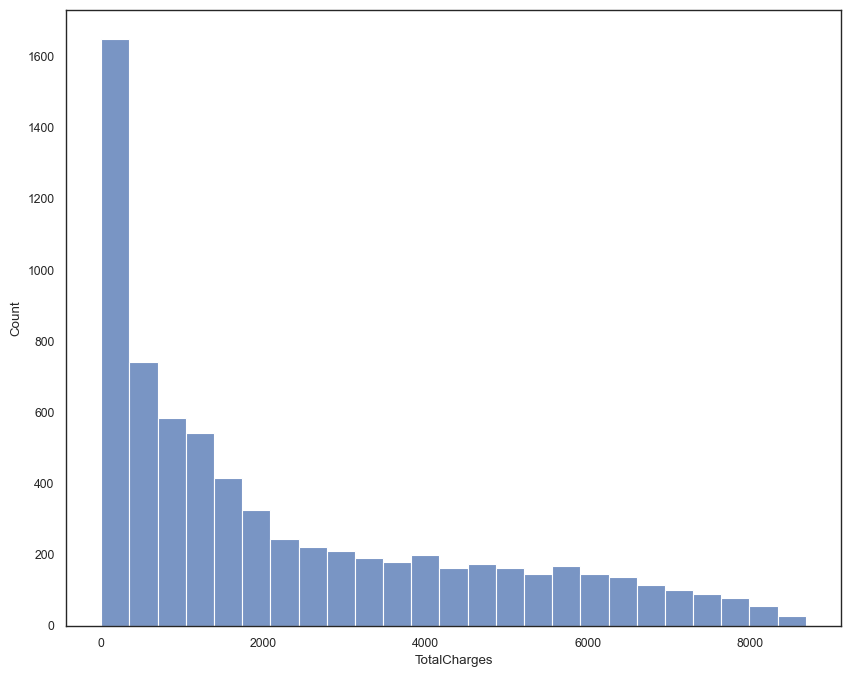

In [153]:
for col in df.select_dtypes(include =['int','float']):
    plt.figure(figsize = (10,8))
    sns.histplot(df[col])

### Discrete Variables plotting

In [139]:
for col in df.select_dtypes(include =['object']):
    print(f'{col :-<30}{df[col].unique()}')

customerID--------------------['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender------------------------['Female' 'Male']
SeniorCitizen-----------------[0 1]
Partner-----------------------['Yes' 'No']
Dependents--------------------['No' 'Yes']
PhoneService------------------['No' 'Yes']
MultipleLines-----------------['No phone service' 'No' 'Yes']
InternetService---------------['DSL' 'Fiber optic' 'No']
OnlineSecurity----------------['No' 'Yes' 'No internet service']
OnlineBackup------------------['Yes' 'No' 'No internet service']
DeviceProtection--------------['No' 'Yes' 'No internet service']
TechSupport-------------------['No' 'Yes' 'No internet service']
StreamingTV-------------------['No' 'Yes' 'No internet service']
StreamingMovies---------------['No' 'Yes' 'No internet service']
Contract----------------------['Month-to-month' 'One year' 'Two year']
PaperlessBilling--------------['Yes' 'No']
PaymentMethod-----------------['Electronic check'

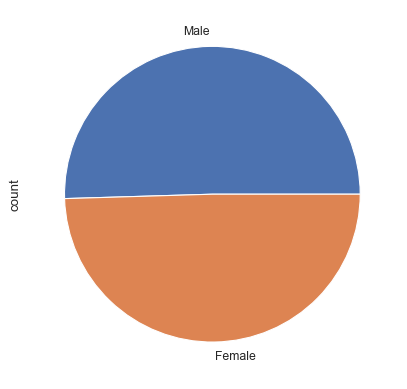

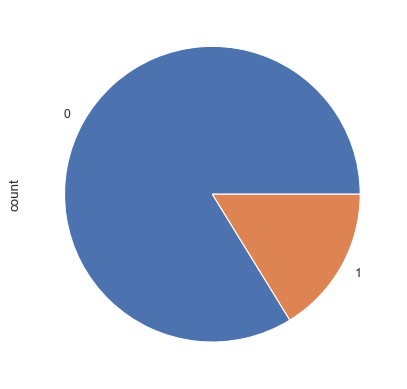

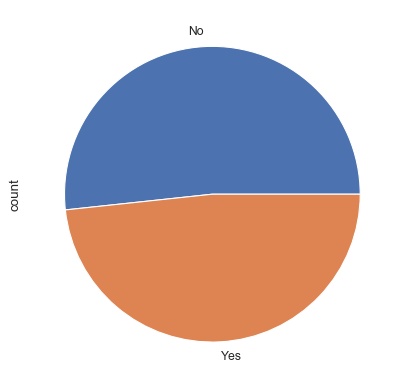

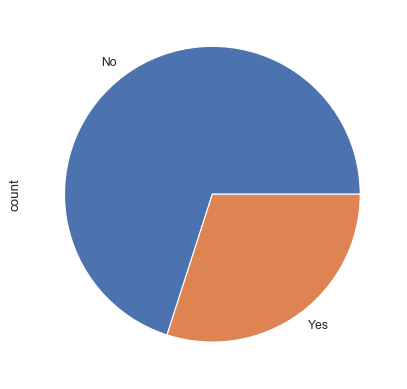

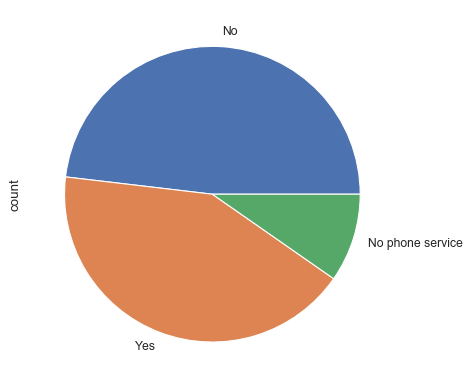

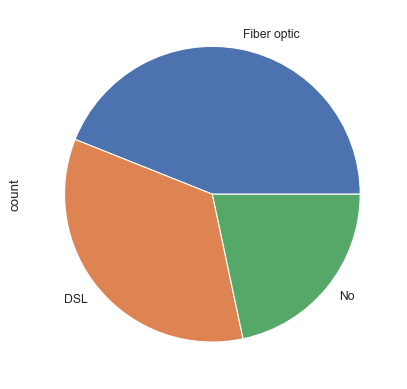

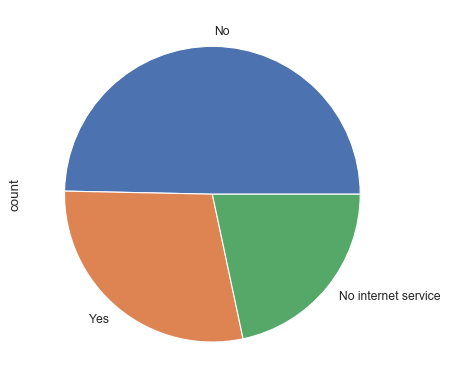

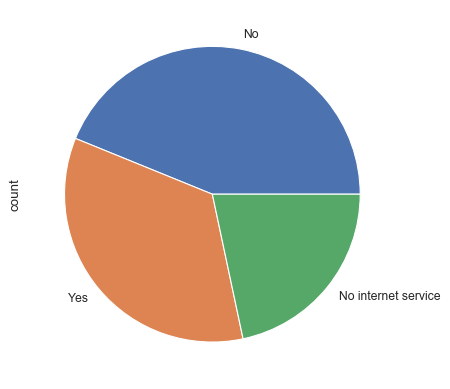

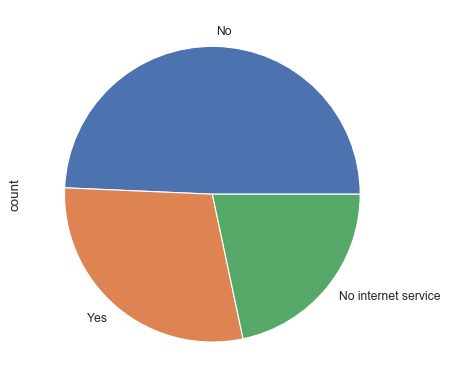

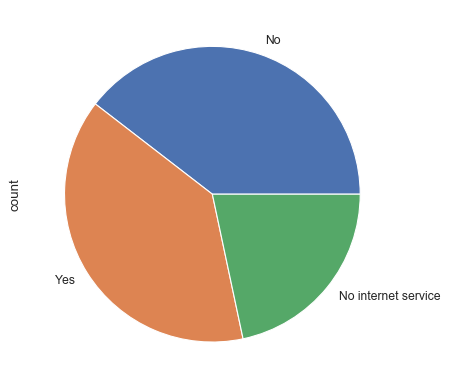

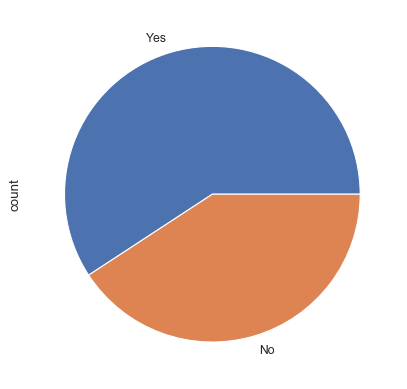

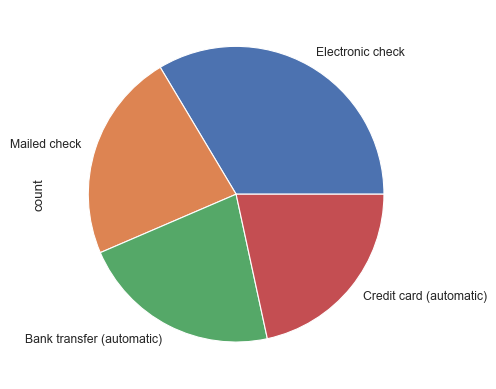

In [151]:
for col in df.select_dtypes(include =['object']):
    plt.figure()
    df[col].value_counts().plot.pie()

###  Variable/target Relationships

#### Subsets creation for target value (Positive/Negative)

In [154]:
positive_df = df[(df['Churn'] == 'Yes')]
negative_df = df[(df['Churn'] == 'No')]

#### Target / Discrete Variables

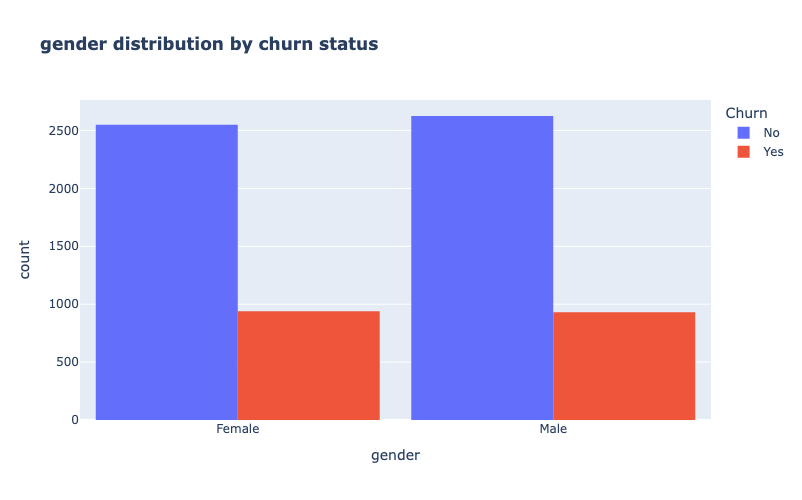

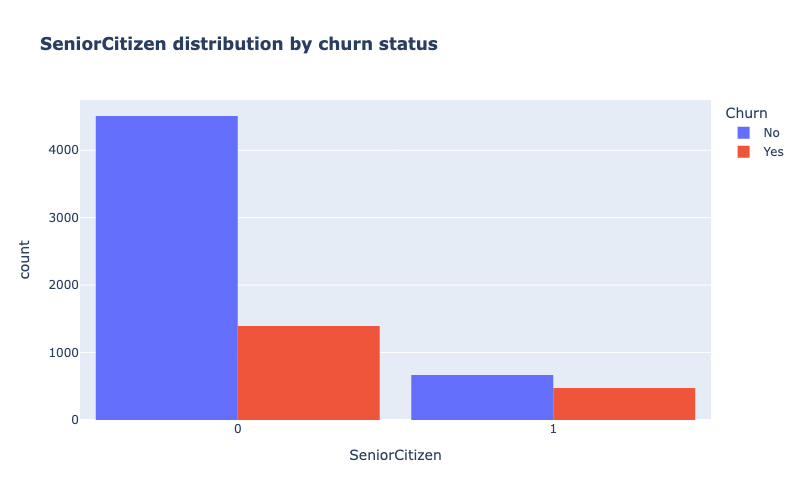

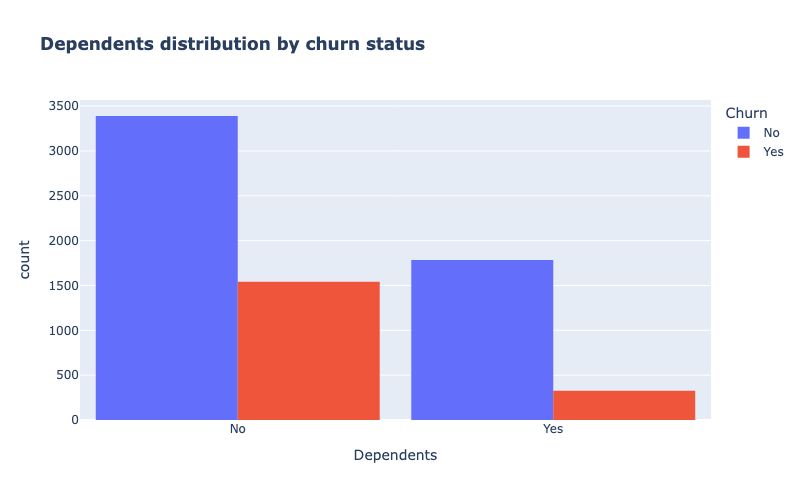

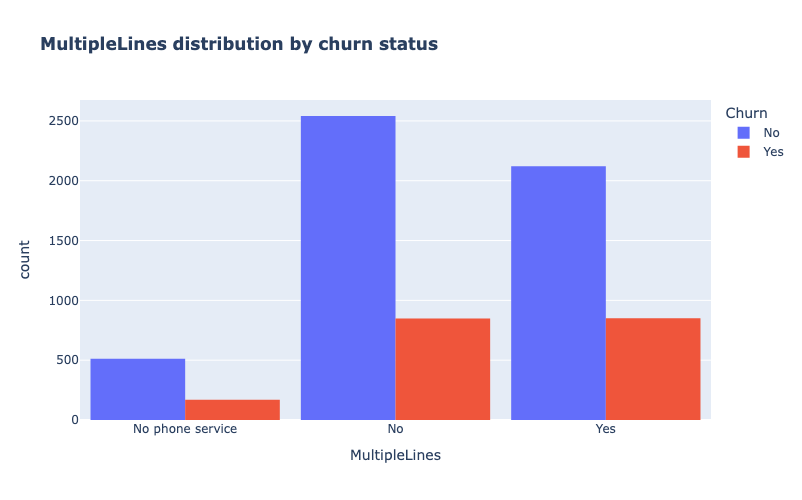

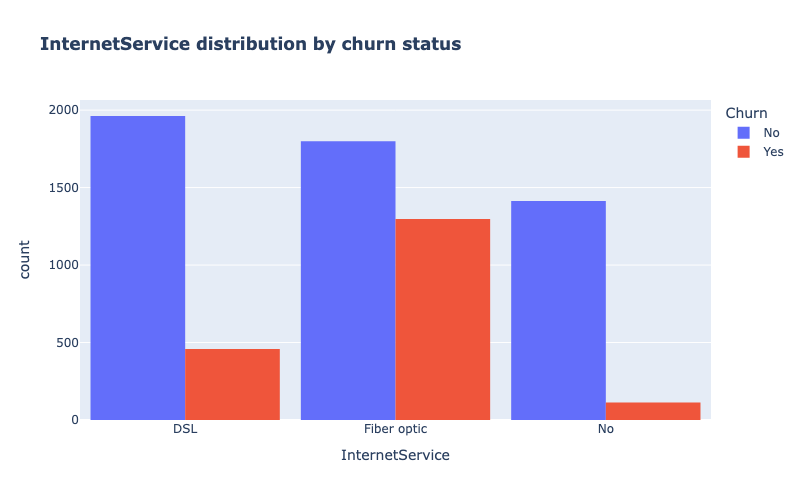

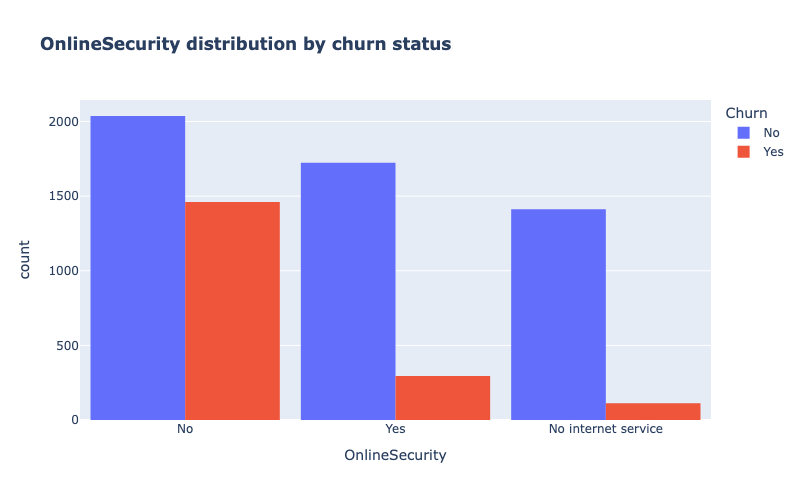

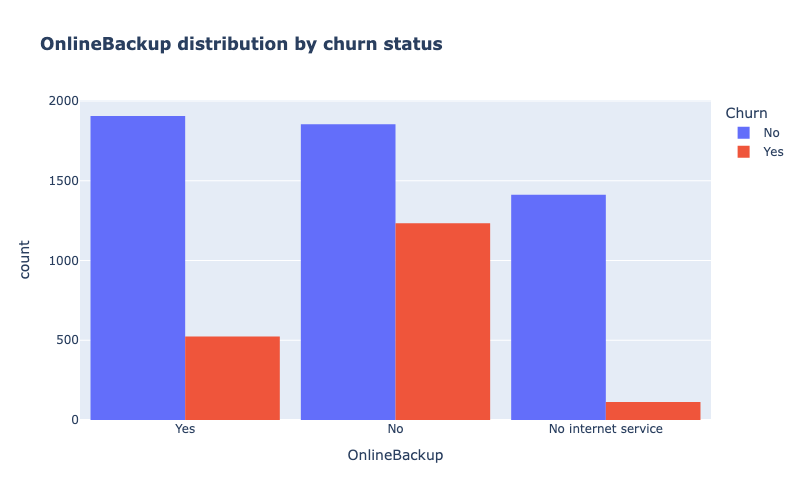

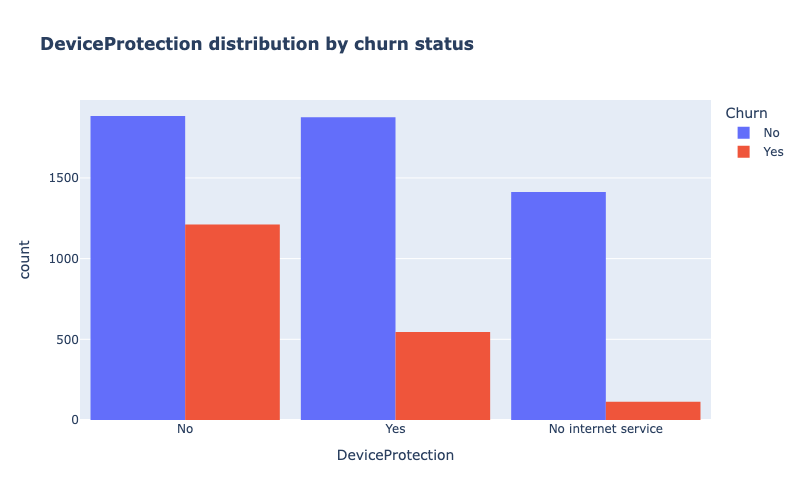

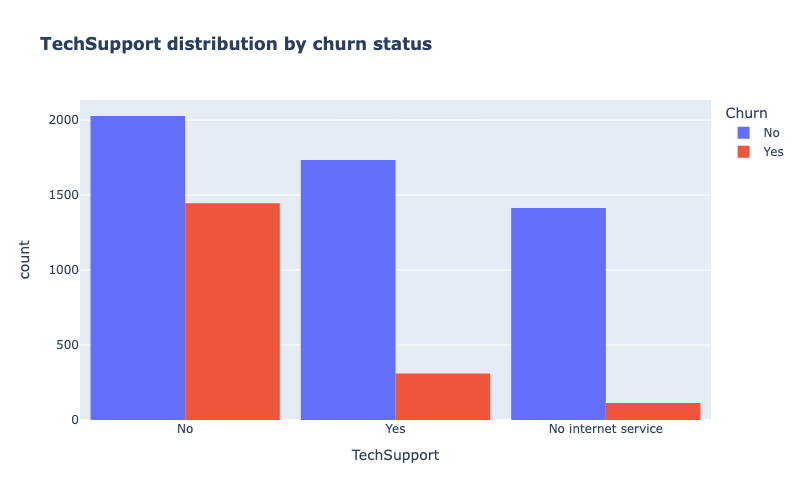

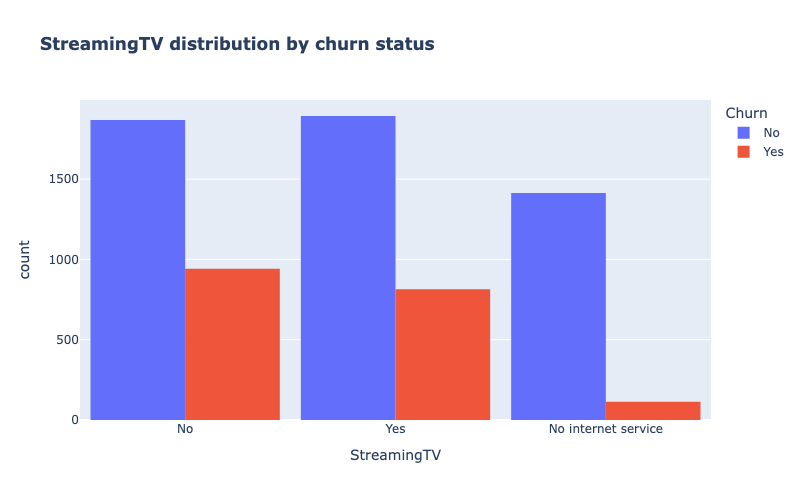

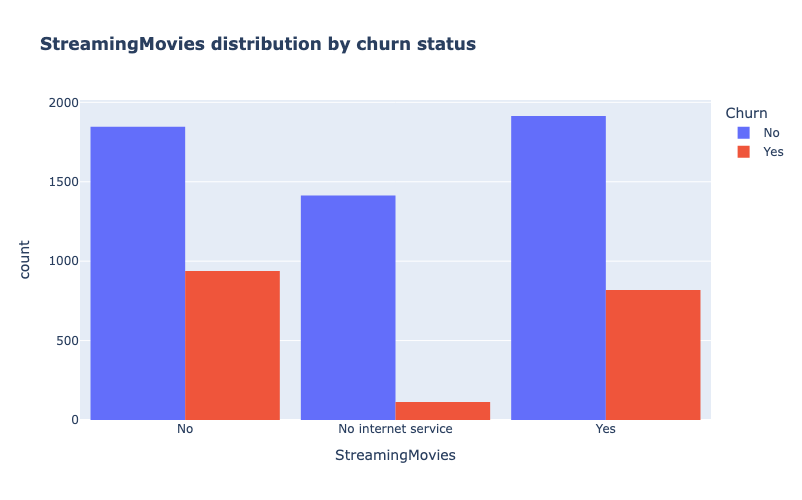

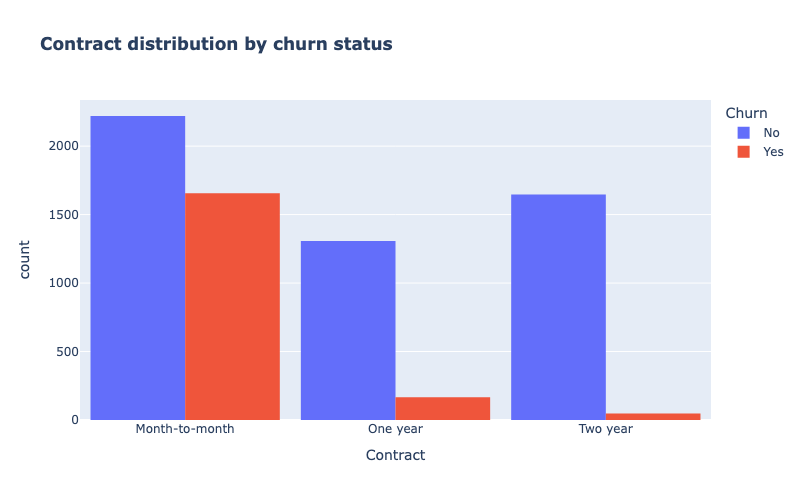

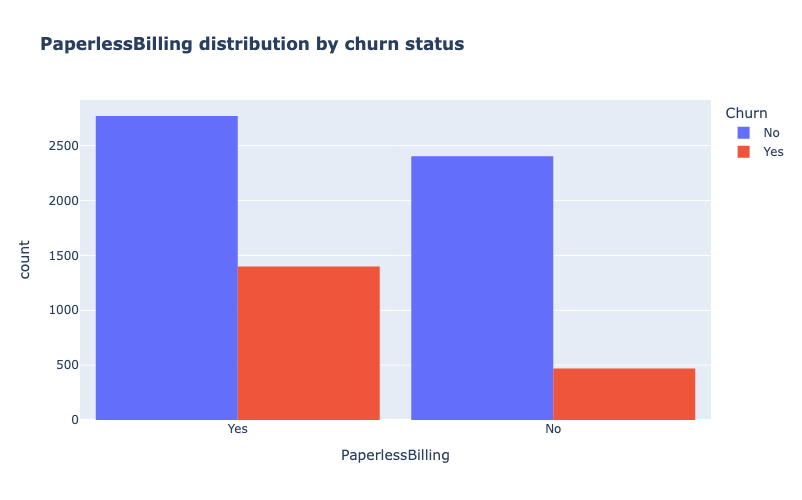

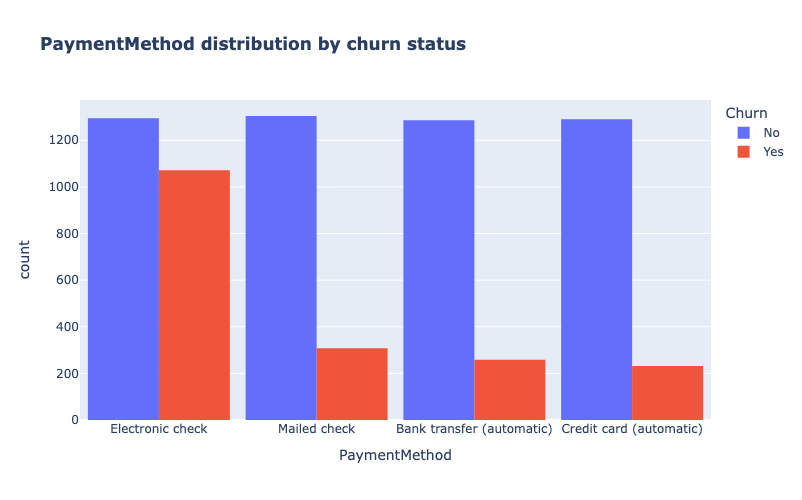

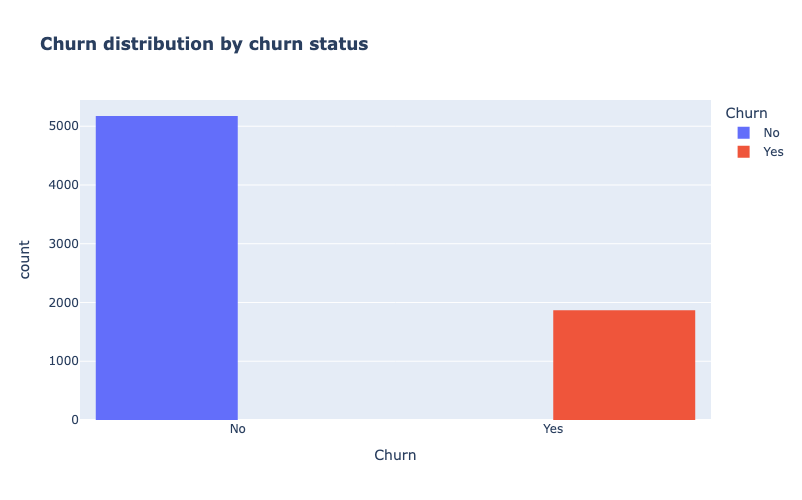

In [155]:
for col in df.select_dtypes(include =['object']):
    fig = px.histogram(
        df,
        x = col, 
        color = 'Churn', 
        barmode ='group', 
        title = f'<b>{col} distribution by churn status<b>')

    fig.update_layout(width=700, height=500, bargap=0.1)
    fig.show()


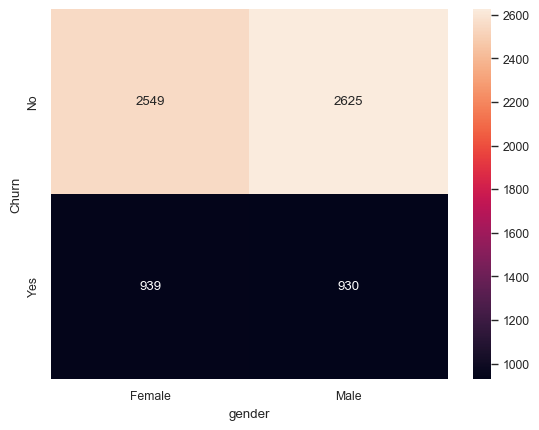

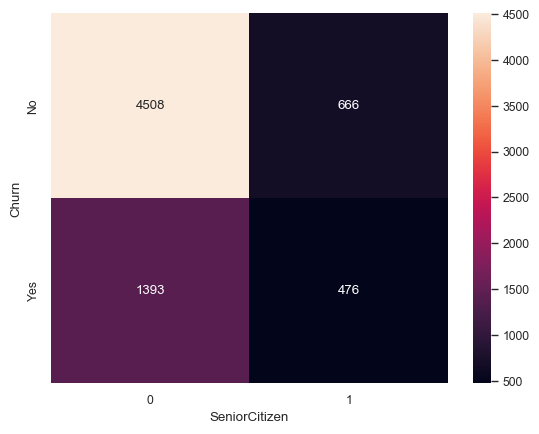

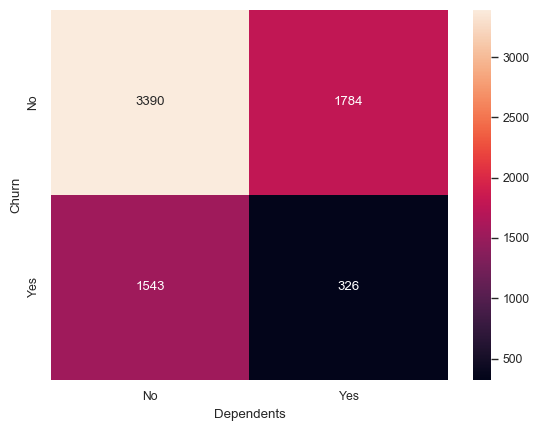

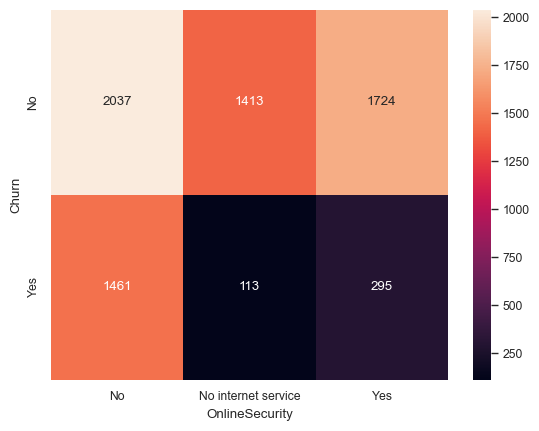

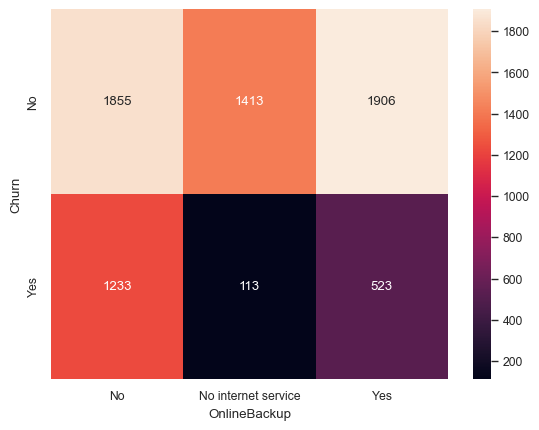

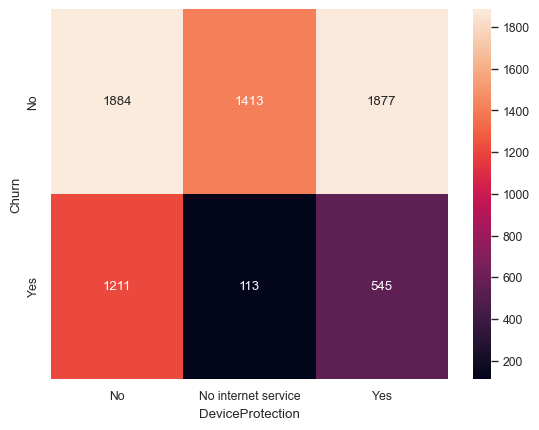

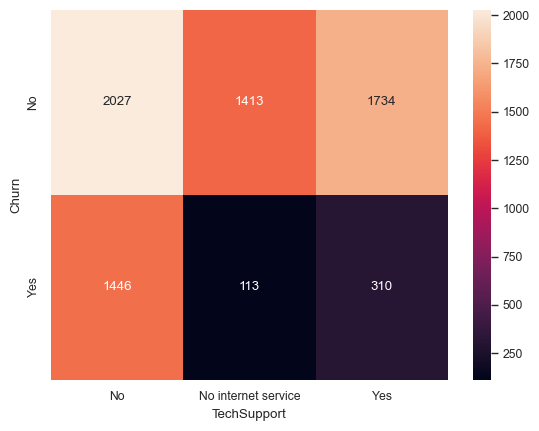

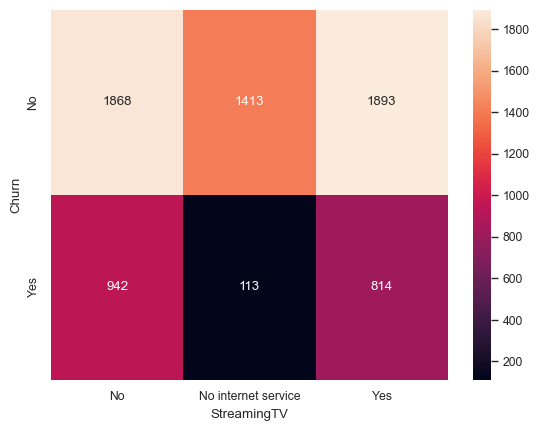

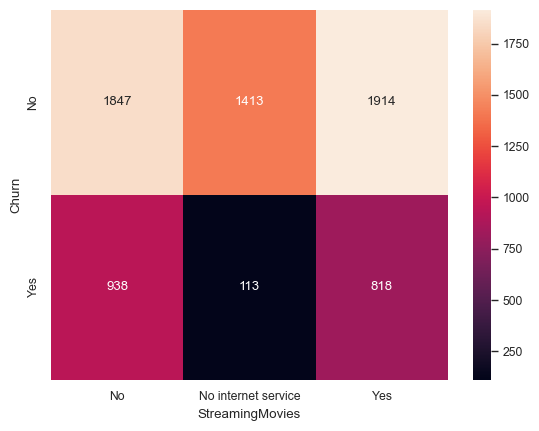

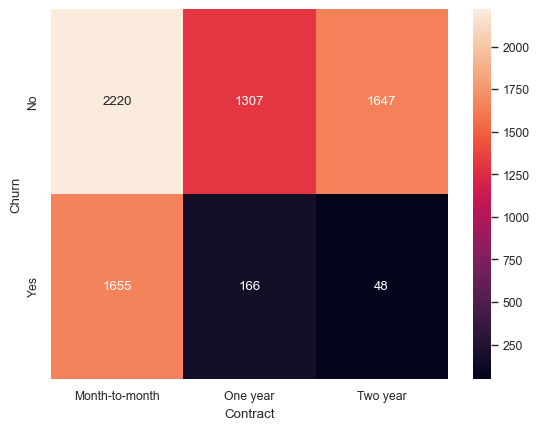

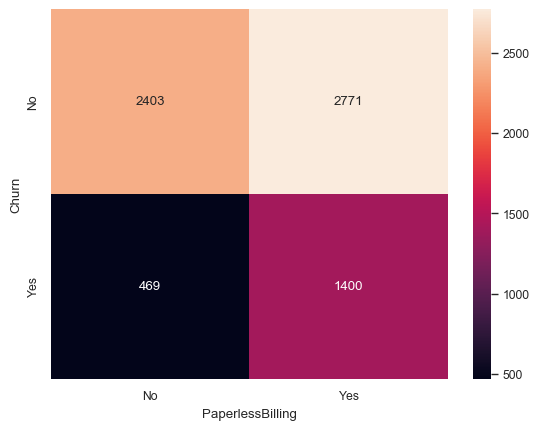

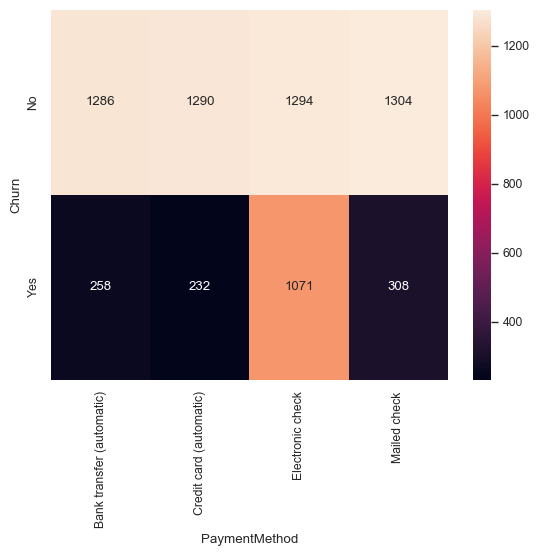

In [156]:
for col in df.select_dtypes(include =['object']):
    plt.figure()
    sns.heatmap(pd.crosstab(df['Churn'], df[col]), annot = True, fmt ='d')

#### Target / Continous Variables

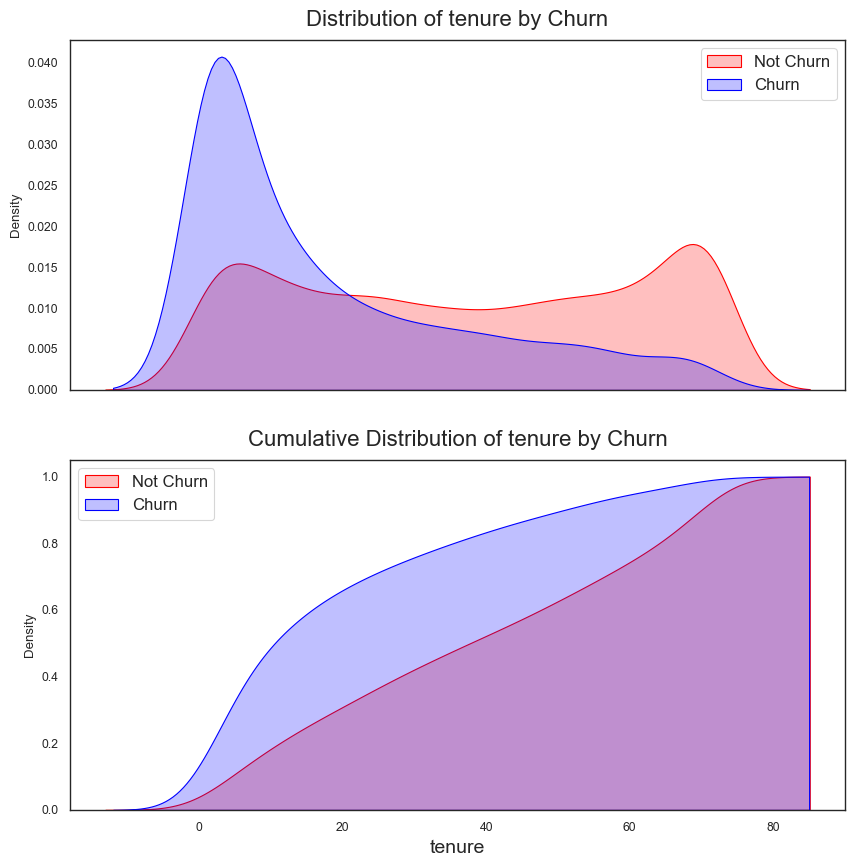

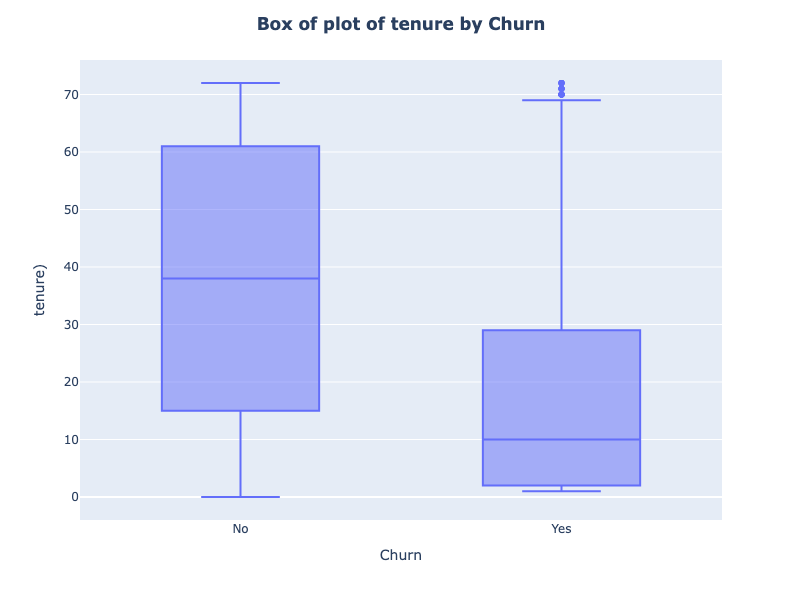

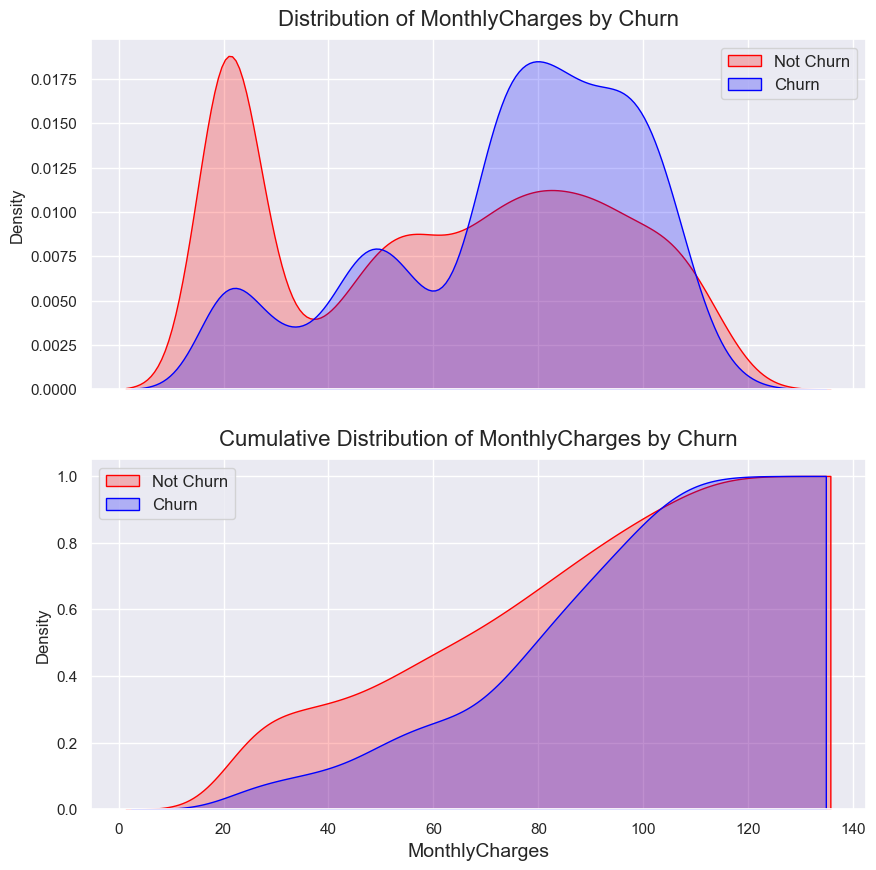

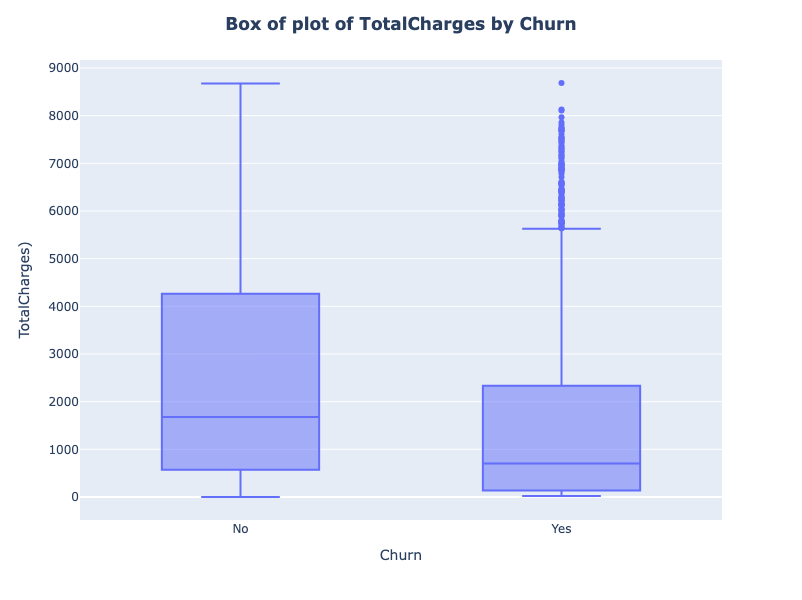

In [157]:
for col in df.select_dtypes(include =['int', 'float']):
    
    #sns.set_context("paper",font_scale=1.1)
    fig, axes = plt.subplots(2, 1, sharex = True, figsize=(10, 10))
    
    #Ax[0] Distribution plot (PDF)
    sns.kdeplot(
        negative_df[col],
        color = "Red", 
        shade = True,
        ax = axes[0]
    )
    
    sns.kdeplot(
        positive_df[col], 
        color = "Blue", 
        shade = True,
        ax = axes[0]
    )
    
    axes[0].set_title(f'Distribution of {col} by Churn', pad = 10, size = 16)
    axes[0].legend(["Not Churn","Churn"],loc='upper right', fontsize = 12);
    
    
    #Ax[1] Cumulative Distribution plot (CDF)
    sns.kdeplot(
        negative_df[col],
        color = "Red", 
        shade = True, 
        cumulative = True,
        ax = axes[1]
    )
    
    sns.kdeplot(
        positive_df[col], 
        color = "Blue", 
        shade = True, 
        cumulative = True,
        ax = axes[1]
    )
                      
    axes[1].set_title(f'Cumulative Distribution of {col} by Churn', pad = 10, size = 16)
    axes[1].legend(["Not Churn","Churn"],loc='upper left', fontsize = 12)
    
    plt.xlabel(f'{col}', fontsize = 14)
    sns.set_theme()
    plt.show()

    #Box Distribution Function
    fig = px.box(df, x = 'Churn', y = col)
    fig.update_yaxes(title_text = f'{col})',row = 1 , col = 1)
    fig.update_xaxes(title_text = 'Churn',row = 1 , col = 1)
    fig.update_layout(
        autosize = True, 
        width = 750, 
        height=600,
        title_font=dict(size=25, family='Courier'),
        title=f'<b> Box of plot of {col} by Churn </b>',
        title_x=0.5
    )
    
    fig.show()

### Variable/Variable Relationships

### Discrete Variables

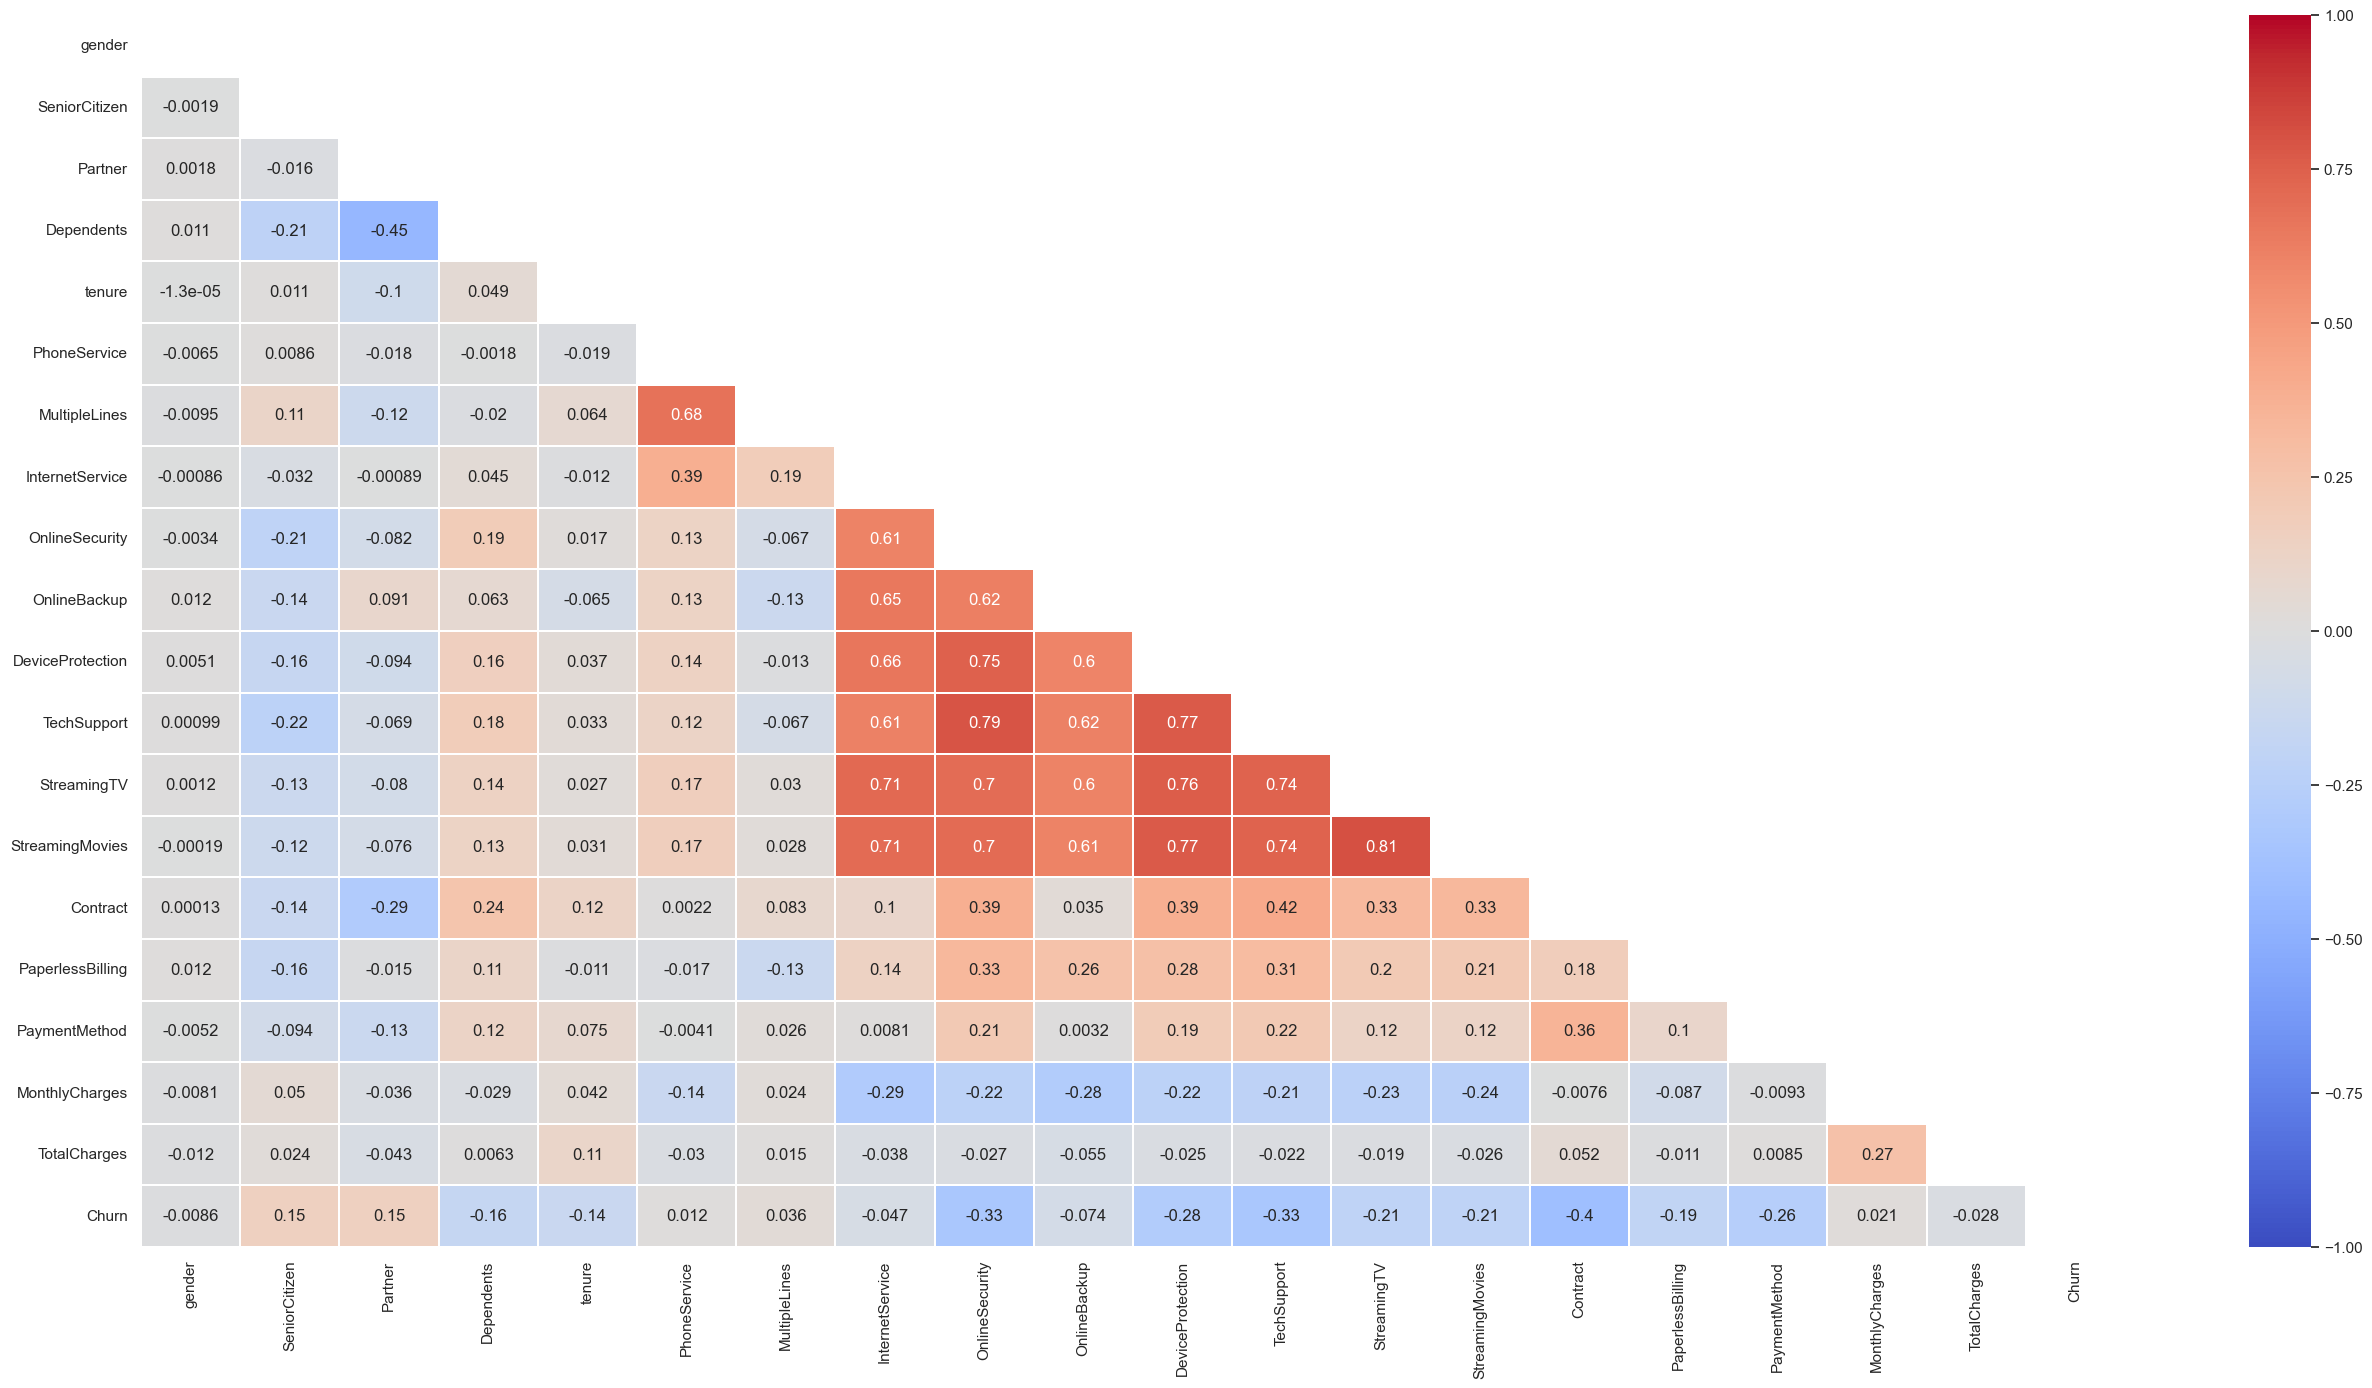

In [158]:
#Relashionship between features 
plt.figure(figsize=(32,16 ))
sns.set_theme(style="white", palette=None)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

sns.set_theme(context='paper', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [159]:
#Relashionship between features 
plt.figure(figsize=(32,16 ))
sns.set_theme(style="white", palette=None)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.clustermap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

sns.set_theme(context='paper', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

<Figure size 3200x1600 with 0 Axes>

### Continuous Variables

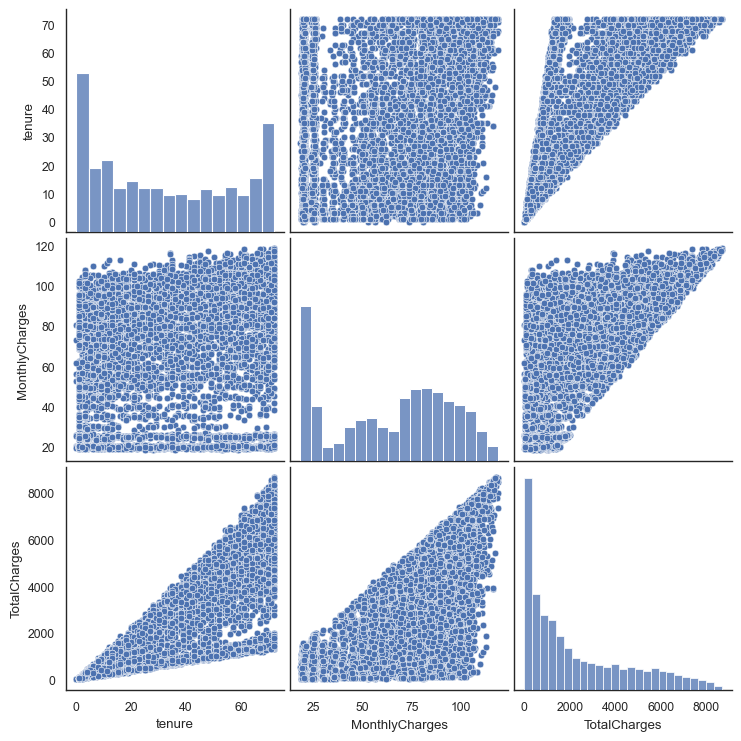

In [160]:
sns.pairplot(df.select_dtypes(include = ['int', 'float']))